# Initialize


In [1]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLMMetrics"

/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLMMetrics


/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [2]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more import MixtureDistributions # type: ignore
from GMetrics.more import deformations # type: ignore
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection, compute_exclusion_bisection_np ,compute_exclusion_LR_bisection # type: ignore
from GMetrics.utils import se_mean, se_std
from GMetrics.metrics.NPLM import candidate_sigma

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/20D_mixture/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-12-16 11:41:44.229231: Importing os...
2024-12-16 11:41:44.229431: Importing sys...
Visible devices: [2]
2024-12-16 11:41:44.229665: Importing timer from timeit...
2024-12-16 11:41:44.229734: Setting env variables for tf import (only device(s) [2] will be available)...
2024-12-16 11:41:44.229858: Importing numpy...
2024-12-16 11:41:44.536352: Importing matplotlib...
2024-12-16 11:41:45.030710: Importing h5py...
2024-12-16 11:41:45.276515: Importing importlib.util...
2024-12-16 11:41:45.276640: Importing json...
2024-12-16 11:41:45.276706: Importing pandas...
2024-12-16 11:41:46.329561: Importing random...
2024-12-16 11:41:46.329722: Importing scipy utils...
2024-12-16 11:41:47.344668: Importing subprocess...
2024-12-16 11:41:47.344795: Importing tensorflow...
Tensorflow version: 2.16.1
2024-12-16 11:41:56.980237: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-12-16 11:41:58.459531: Importing timeit...
2024-12-16 11:41:58.459622: Importing tqdm...
2

/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-12-16 11:42:11.491431: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #2, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
Model directory exists
2024-12-16 11:42:11.524326: All done.


# Model definition

In [3]:
seed = 0
ncomp = 5
ndims = 20
niter = 10_000
dist_1 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
dist_2 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_1: ', dist_1.sample(2))
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_2: ', dist_2.sample(2))

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture_same_family.MixtureSameFamily'> <class 'tensorflow_probability.python.distributions.mixture_same_family.MixtureSameFamily'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (20,) (20,)
sample from dist_1:  tf.Tensor(
[[-1.83421882 -2.06783122  4.09105269  0.03095917 -1.56718709  0.34977657
   3.0630149  -1.44444071 -4.00315009 -3.50742937 -1.2893355   1.38268988
   0.17543375 -0.32427479  0.1434904  -1.72837525 -2.16520351 -5.74555338
   3.07620369 -0.17279678]
 [ 2.77900886 -0.87105042  3.30419077 -1.39634478  0.05202988  3.73871325
   0.498473   -0.76207158  0.99958344  0.06647955 -0.56692222  1.73301043
  -4.91548049  0.21198975  0.07424798 -2.87146289  4.37141543 -5.07674448
   0.96027734  3.24948898]], shape=(2, 20), dtype=float64)
sample from dist_2:  tf.Tensor(
[[-1.83421882

# Fixed $n=m=50000$

## Null hypothesis

### Model definition

In [4]:
batch_size_test = 50000

In [5]:
m_value = 12000
lam_value = 1e-7

In [6]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")

# null_hypotheses_dir = model_dir + "null_hypothesis/"
# if os.path.exists(null_hypotheses_dir):
#     print("Null hypothesis directory exists")
# else:
#     os.makedirs(null_hypotheses_dir)
#     print("Null hypothesis directory was created")
# metrics_config_file = model_dir + "metrics_config.json"

null_hypotheses_dir = model_dir + f"null_hypothesis_M_{m_value}_lam_{lam_value}/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + f"metrics_config_M_{m_value}_lam_{lam_value}.json"

Model directory exists
Null hypothesis directory exists


In [7]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = False,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Using numpy mode with TensorFlow inputs.
Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
nsamples 500000000
batch_size 50000
niter 10000
niter * batch_size 500000000
small_sample False


In [8]:
flk_sigma = candidate_sigma(dist_1, perc = 90)  

NPLMMetric = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                 progress_bar = True,
                                 verbose = True,
                                 M = m_value, 
                                 lam = lam_value, 
                                 iter_list = 1000000,
                                 flk_sigma = flk_sigma,
                                 weight = 1) 

# lam_list = [1e-6, 1e-7, 1e-8, 1e-9]
# M_list = [3000, 5000, 7000, 9000]
# nplm_objects = {}

# for i, lam in enumerate(lam_list):
#     nplm_objects[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
#                                       progress_bar = True,
#                                       verbose = True,
#                                       M = 2000, 
#                                       lam = lam, 
#                                       iter_list = 1000000,
#                                       flk_sigma = flk_sigma,
#                                       weight = 1)
#     print(f"lam value for NPLMMetric_{i} is: {nplm_objects[f'NPLMMetric_{i}'].nplm_kwargs.get('lam')}")    #If you want to create different objects for 
                                                                                                             #different values of M and lam 

Known distribution case. The distribution is the costum made MixMultiNormal.

The gaussian kernel sigma is estimated as 1/3.5 of the 90th percentile of the pairwise distance among 10000 points extracted from the reference distribution.
The value of sigma is: 5.971428571428571
The 3.5 value has been chosen looking at the pairwise distribution in 20D.
If you want you can change its value in metrics.NPLM.


### Set up tests and metrics configurations

In [ ]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,50000,10000,10000000,float64,0,False,False,None,True,...,20,0,True,20,0,float64,20,500000000,False,5


In [10]:
# unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncomp_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
# metrics_config = {unique_key: {"NPLM": {"name": "nplm",
#                                        "object_name": "NPLMMetric",
#                                        "class_name": "GMetrics.NPLMMetric",
#                                        "kwargs": {"M": 3000,
#                                                   "lam": 1e-6,
#                                                   "iter_list": 1000000,
#                                                   "weight" : 1},
#                                        "result_key": "metric_list", 
#                                        "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
#                                        "scale_func_string": "lambda ns, ndims: 1",
#                                        "test_config": test_config_null,
#                                        "max_vectorize": 1000, # optimized for 5D
#                                        "latex": "$t_{\mathrm{NPLM}}$",
#                                        "null_file": null_hypotheses_dir+"NPLM.json"}}}

# print(metrics_config[unique_key])
# nplm_config = metrics_config[unique_key]["NPLM"]
# print(nplm_config)

unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncomp_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"NPLM": {"name": "nplm",
                                       "object_name": "NPLMMetric",
                                       "class_name": "GMetrics.NPLMMetric",
                                       "kwargs": {"M": m_value,
                                                  "lam": lam_value,
                                                  "iter_list": 1000000,
                                                  "flk_sigma": flk_sigma,
                                                  "weight" : 1},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000, # optimized for 5D
                                       "latex": "$t_{\mathrm{NPLM}}$",
                                       "null_file": null_hypotheses_dir+"NPLM.json"}}}

print(metrics_config[unique_key])
nplm_config = metrics_config[unique_key]["NPLM"]
print(nplm_config)

{'NPLM': {'name': 'nplm', 'object_name': 'NPLMMetric', 'class_name': 'GMetrics.NPLMMetric', 'kwargs': {'M': 12000, 'lam': 1e-07, 'iter_list': 1000000, 'flk_sigma': 5.971428571428571, 'weight': 1}, 'result_key': 'metric_list', 'scale_func': <function <lambda> at 0x7fd54c457f60>, 'scale_func_string': 'lambda ns, ndims: 1', 'test_config': {'niter': 10000, 'batch_size_test': 50000, 'batch_size_gen': 10000, 'small_sample_threshold': 10000000, 'dtype_input': 'float64', 'seed': 0, 'use_tf': False, 'mirror_strategy': False, 'strategy': None, 'verbose': True, 'is_symb_1': True, 'ndims_1': 20, 'nsamples_1': 0, 'is_symb_2': True, 'ndims_2': 20, 'nsamples_2': 0, 'dtype': 'float64', 'ndims': 20, 'nsamples': 500000000, 'small_sample': False, 'ncomp': 5}, 'max_vectorize': 1000, 'latex': '$t_{\\mathrm{NPLM}}$', 'null_file': 'results/20D_mixture/20D_50K/null_hypothesis_M_12000_lam_1e-07/NPLM.json'}}
{'name': 'nplm', 'object_name': 'NPLMMetric', 'class_name': 'GMetrics.NPLMMetric', 'kwargs': {'M': 12000

### Evaluate null hypotheses

In [11]:
file = nplm_config["null_file"]
name = nplm_config["name"]
max_vectorize = nplm_config["max_vectorize"]
obj = eval(nplm_config["object_name"])
if os.path.exists(file):
     print(f"Loading {name} from {file}")
     obj.Results.load_from_json(file)
else:
    print(f"Computing and saving {name}")
    obj.Test_np()
    print(f"Saving {name} to {file}")
    obj.Results.save_to_json(file)

Loading nplm from results/20D_mixture/20D_50K/null_hypothesis_M_12000_lam_1e-07/NPLM.json


In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []


name = nplm_config["name"]
obj = eval(nplm_config["object_name"])
result_key = nplm_config["result_key"]
scale_func = nplm_config["scale_func"]

nsamples = obj.Inputs.batch_size_test
ns = nsamples**2 /(2*nsamples)
dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

metric_thresholds = [[cl, 
                        [int(cl*len(dist_null)), 
                        int((1-cl)*len(dist_null))], 
                        np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
print(f"ThresholdS for metric {nplm_config['name']}: {metric_thresholds}")
null_time = obj.Results[-1].__dict__['computing_time']
null_times.append([name, int(null_time)])
print(f"Computing time for metric {nplm_config['name']}: {null_time}")

nplm_config.update({"thresholds": metric_thresholds})
  
print(f"If you want to look into it the file to check is: {metrics_config_file}")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric nplm: [[0.68, [6800, 3199], 6220.872075675252], [0.95, [9500, 500], 6381.82638320516], [0.99, [9900, 100], 6467.752360014553]]
Computing time for metric nplm: 61789.523834572174
If you want to look into it the file to check is: results/20D_mixture/20D_50K/metrics_config_M_12000_lam_1e-07.json


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,nplm,NPLMMetric,GMetrics.NPLMMetric,"{'M': 12000, 'lam': 1e-07, 'iter_list': 100000...",metric_list,<function <lambda> at 0x7fd54c457f60>,"lambda ns, ndims: 1","{'niter': 10000, 'batch_size_test': 50000, 'ba...",1000,$t_{\mathrm{NPLM}}$,results/20D_mixture/20D_50K/null_hypothesis_M_...,"[[0.68, [6800, 3199], 6220.872075675252], [0.9..."


### Plots of null-distributions

mu = 6159.603031519638 +/- 179.54329810077422
sigma = 133.9937678031237 +/- 0.9357092394851197
68%CL = 6220.872075675252, 95%CL = 6381.82638320516, 99%CL = 6467.752360014553
mu = 6159.603031519638 +/- 179.54329810077422
sigma = 133.9937678031237 +/- 0.9357092394851197


/tmp/ipykernel_1837353/3764764153.py:65: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1837353/3764764153.py:67: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1837353/3764764153.py:95: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1837353/3764764153.py:101: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


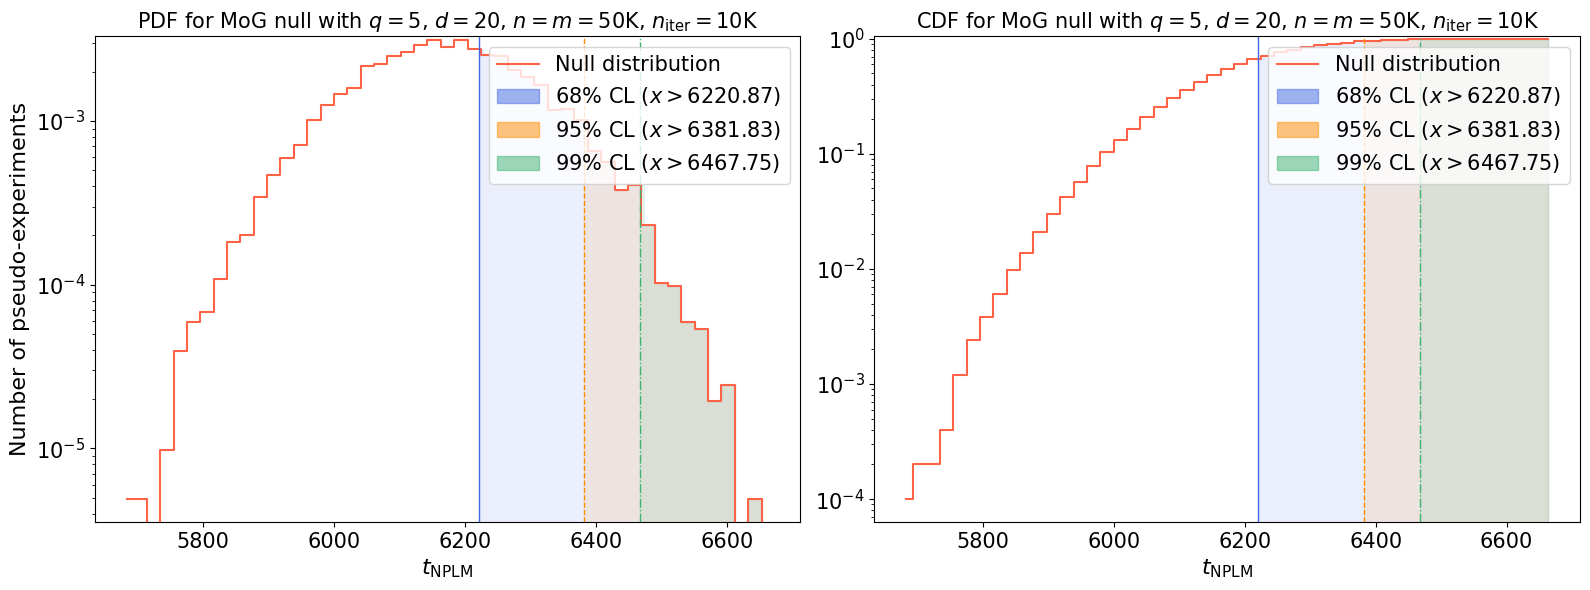

Time elapsed: 1.4107489148154855 seconds.


In [13]:

name = nplm_config["name"]
name_cap = name.upper()
latex = nplm_config["latex"]
obj = eval(nplm_config["object_name"])
result_key = nplm_config["result_key"]
scale_func = nplm_config["scale_func"]
figure_file = nplm_config["null_file"].replace("json","pdf")
thresholds = nplm_config["thresholds"]

start = timer()

nsamples = obj.Inputs.batch_size_test
niter = obj.Inputs.niter
ns = nsamples**2 /(2*nsamples)
dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

scale = 'log'
num_bins = 50  # number of bins|

mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
print(f"mu = {mu} +/- {deltamu}")
print(f"sigma = {sigma} +/- {deltasigma}")
print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")

print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)

min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
x = np.linspace(min_x, max_x, num_bins + 1)
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

dash_styles = ['-', '--', '-.']
colors = ["royalblue", "darkorange", "mediumseagreen"]

# Create step plot
step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
current_ylim0 = ax[0].get_ylim()

ax[0].set_yscale(scale)
ax[0].set_xlabel(r"%s"%latex, fontsize=16)
ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $d = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

for i, threshold in enumerate(thresholds):
    confidence_level, _, threshold_value = threshold

    start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
    start_index = max(start_index, 0)
    fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
    fill_y_values = step_counts[start_index:]
    if len(fill_x_range) > 1 and len(fill_y_values) > 0:
        ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
    ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

ax[0].set_ylim(current_ylim0)  
legend0 = ax[0].legend(loc='upper right', fontsize=15)
for handle in legend0.legendHandles[-3:]:
    handle.set_alpha(0.5)  # Set to desired alpha value

# Create step plot
step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges

ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
#ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
current_ylim1 = ax[1].get_ylim()

ax[1].set_yscale(scale)
ax[1].set_xlabel(r"%s"%latex, fontsize=16)
ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $d = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

for i, threshold in enumerate(thresholds):
    confidence_level, _, threshold_value = threshold

    start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
    start_index = max(start_index, 0)
    fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
    fill_y_values = step_counts[start_index:]
    if len(fill_x_range) > 1 and len(fill_y_values) > 0:
        ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
    ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

ax[1].set_ylim(current_ylim1)  
#for i, threshold in enumerate(thresholds):
#    confidence, _, value = threshold
#    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")

legend1 = ax[1].legend(loc='upper right', fontsize=15)
for handle in legend1.legendHandles[-3:]:
    handle.set_alpha(0.5)  # Set to desired alpha value

plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
plt.tight_layout()
plt.savefig(figure_file)
plt.show()
plt.close()

nplm_config.update({"null_figure": figure_file})

end = timer()
print("Time elapsed:", end-start, "seconds.")

#GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [14]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
    
test_kwargs = {"niter_null": niter,
               "niter_alt": 100,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [15]:
# file_path = os.path.join(model_dir, "exclusion_limits.json")
# if os.path.exists(file_path):
#     try:
#         with open(file_path, "r") as file:
#             existing_data = json.load(file)
#     except json.JSONDecodeError:
#         existing_data = {}
# else:
#     existing_data = {}
    
# # Sort the dictionary by keys
# existing_data = dict(sorted(existing_data.items()))

# # Save the sorted dictionary back to a JSON file
# with open(file_path, 'w') as f:
#     json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

file_path = os.path.join(model_dir, f"exclusion_limits_M_{m_value}_lam_{lam_value}.json")
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}
    
# Sort the dictionary by keys
existing_data = dict(sorted(existing_data.items()))

# Save the sorted dictionary back to a JSON file
with open(file_path, 'w') as f:
    json.dump(existing_data, f, cls=GMetrics.utils.CustomEncoder, indent=4) # type: ignore

In [16]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
bounds = ["upper", "central", "lower"]
global_results = {}

for deformation in deformations:
    eps_max = 1  # Default starting value
    for bound in bounds:
        try:
            # Filter results for the current deformation and bound
            result = {
                k: v for k, v in existing_data.items()
                if v["null_config"]["name"] == nplm_config["name"]
                and v["deformation"] == deformation
                and v["bound"] == bound
            }
        except Exception:
            result = {}

        if result:
            print(f"{bound.capitalize()} bounds for {nplm_config['name']} with {deformation} deformation already loaded.")
            # Update eps_max to the last computed epsilon in the exclusion list
            last_result = list(result.values())[0]
            if last_result["exclusion_list"]:
                eps_max = last_result["exclusion_list"][-1][3]  # Last epsilon value
        else:
            print(f"Computing {bound} bounds for {nplm_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection_np(
                dist_1,
                metric_config=nplm_config,
                test_kwargs=test_kwargs,
                model_dir=model_dir,
                deformation=deformation,
                seed_dist=0,
                x_tol=0.01,
                fn_tol=0.05,
                bound=bound,
                eps_min=0.0,
                eps_max=eps_max,
                max_iterations=50,
                save=True,
                filename=f"exclusion_limits_M_{m_value}_lam_{lam_value}.json",
                verbose=True
            )
            eps_max = list(result.values())[0]["exclusion_list"][-1][3]  # Update eps_max
        global_results.update(result)

print(global_results.keys())


Upper bounds for nplm with mean deformation already loaded.
Central bounds for nplm with mean deformation already loaded.
Lower bounds for nplm with mean deformation already loaded.
Upper bounds for nplm with cov_diag deformation already loaded.
Central bounds for nplm with cov_diag deformation already loaded.
Lower bounds for nplm with cov_diag deformation already loaded.
Upper bounds for nplm with cov_off_diag deformation already loaded.
Central bounds for nplm with cov_off_diag deformation already loaded.
Lower bounds for nplm with cov_off_diag deformation already loaded.
Upper bounds for nplm with power_abs_up deformation already loaded.
Central bounds for nplm with power_abs_up deformation already loaded.
Lower bounds for nplm with power_abs_up deformation already loaded.
Upper bounds for nplm with power_abs_down deformation already loaded.
Central bounds for nplm with power_abs_down deformation already loaded.
Lower bounds for nplm with power_abs_down deformation already loaded.


## Show and save results

In [17]:
import notebooks.shared as shared

In [18]:
results_df, times_df = shared.generate_result_dataframe_nplm(global_results, null_times)

Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm
Metric: nplm


In [19]:
results_df_mean, results_df_cov_diag, results_df_cov_off_diag, results_df_power_abs_up, results_df_power_abs_down, results_df_random_normal, results_df_random_uniform = shared.get_individual_dfs_nplm(results_df, show = True)

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
2,nplm,$0.00573_{-0.0022}^{+0.0017}$,$0.007_{-0.0018}^{+0.0016}$,$15953$


,Statistic,$\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{ii}}$ (s)
0,nplm,$0.00131_{-0.0006}^{+0.0005}$,$0.00161_{-0.00048}^{+0.00046}$,$20295$


,Statistic,$\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$,$\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$,$t^{\Sigma_{i\neq j}}$ (s)
1,nplm,$0.0012_{-0.0005}^{+0.00039}$,$0.0015_{-0.0004}^{+0.00036}$,$18640$


,Statistic,$\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{+}}$ (s)
4,nplm,$0.00049_{-0.00023}^{+0.00018}$,$0.0006_{-0.00018}^{+0.00017}$,$26300$


,Statistic,$\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$,$\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$,$t^{\rm{pow}_{-}}$ (s)
3,nplm,$0.00051_{-0.00018}^{+0.00014}$,$0.00063_{-0.00014}^{+0.00012}$,$19802$


,Statistic,$\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$,$t^{\mathcal{N}}$ (s)
5,nplm,$0.08319_{-0.023}^{+0.014}$,$0.09371_{-0.015}^{+0.011}$,$13939$


,Statistic,$\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$,$\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$,$t^{\mathcal{U}}$ (s)
6,nplm,$0.144_{-0.039}^{+0.025}$,$0.16221_{-0.026}^{+0.019}$,$13245$


In [20]:
#tex_string = shared.generate_result_latex_wide(results_df, times_df, nstring = "10^{4}")
tex_string = shared.generate_result_latex_nplm(results_df, times_df, title = "{\\bf MoG model with $\\mathbf{d=20}$, $\\mathbf{q=5}$ and $\\mathbf{n=m=5\cdot 10^{4}}$}")
print(tex_string)

\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf MoG model with $\mathbf{d=20}$, $\mathbf{q=5}$ and $\mathbf{n=m=5\cdot 10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.00573_{-0.0022}^{+0.0017}$ & $0.007_{-0.0018}^{+0.0016}$ & $15953$ & $0.00131_{-0.0006}^{+0.0005}$ & $0.00161_{-0.00048}^{+0.00046}$ & $20295$ \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\Sigma_{i\neq j}$-deformation} & \multicolumn{3}{c}{$\rm{pow}_{+}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{NPLM}}$ & $0.0012_{-0.0005}^{+0.00039}$ & $0.0015_{-0.0004}^{+0.00036}$ 

/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLMMetrics/notebooks/shared.py:554: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  return df.replace(column_replacements)


In [21]:
shared.save_latex(tex_string, model_dir)

LaTeX table code has been written to results/20D_mixture/20D_50K/results_table.tex


In [22]:
import re
      
# Path to the old metrics results table
file_path_other_metrics = "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/projects/GenerativeModelsMetrics/results/" + str(ndims) + "D_mixture/" + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/results_table.tex"

with open(file_path_other_metrics, 'r') as file:
    table_other_metrics = file.read()

# for each metric I isolate the respective row and color in red NPLM. This is done in order to provide a table with the right ordering of the metrics

nplm_rows = []
lines_nplm = tex_string.splitlines()
for line in lines_nplm:
	if "$t_{\mathrm{NPLM}}$" in line:
		nplm_rows.append("\\rowcolor{red!35}"+line)
	else:
		pass

sw_rows = []
lines_sw = table_other_metrics.splitlines()
for line in lines_sw:
	if "$t_{\mathrm{SW}}$" in line:
		sw_rows.append(line)
	else:
		pass

ks_rows = []
lines_ks = table_other_metrics.splitlines()
for line in lines_ks:
	if "$t_{\overline{\mathrm{KS}}}$" in line:
		ks_rows.append(line)
	else:
		pass

sks_rows = []
lines_sks = table_other_metrics.splitlines()
for line in lines_sks:
	if "$t_{\mathrm{SKS}}$" in line:
		sks_rows.append(line)
	else:
		pass

fgd_rows = []
lines_fgd = table_other_metrics.splitlines()
for line in lines_fgd:
	if "$t_{\mathrm{FGD}}$" in line:
		fgd_rows.append(line)
	else:
		pass

mmd_rows = []
lines_mmd = table_other_metrics.splitlines()
for line in lines_mmd:
	if "$t_{\mathrm{MMD}}$" in line:
		mmd_rows.append(line)
	else:
		pass

llr_rows = []
lines_llr = table_other_metrics.splitlines()
for line in lines_llr:
	if "$t_{\mathrm{LLR}}$" in line:
		llr_rows.append(line)
	else:
		pass

lines_old = table_other_metrics.splitlines()
new_lines = []
i = 0  

for lines in lines_old:
    if "$t_{\\mathrm{SW}}$" not in lines and "$t_{\\overline{\\mathrm{KS}}}$" not in lines and "$t_{\\mathrm{SKS}}$" not in lines and "$t_{\\mathrm{FGD}}$" not in lines and "$t_{\\mathrm{MMD}}$" not in lines and "$t_{\\mathrm{LLR}}$" not in lines:
        new_lines.append(lines)
    elif "$t_{\\mathrm{SW}}$" in lines:
        new_lines.append(lines)
        new_lines.append(ks_rows[i])
        new_lines.append(sks_rows[i])
        new_lines.append(fgd_rows[i])
        new_lines.append(mmd_rows[i])
        new_lines.append(nplm_rows[i])
        new_lines.append(llr_rows[i])
        i = (i + 1) % len(nplm_rows)
    else:
        pass

updated_table = "\n".join(new_lines)

print(updated_table)


\begin{tabular}{l|llr|llr}
	\toprule
	\multicolumn{7}{c}{{\bf MoG model with $\mathbf{d=20}$, $\mathbf{q=5}$, and $\mathbf{n=m=5\cdot 10^{4}}$}} \\
	\toprule
	\multicolumn{1}{c}{} & \multicolumn{3}{c}{$\mu$-deformation} & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation} \\
	Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
	\midrule
	$t_{\mathrm{SW}}$ & $0.04957_{-0.02}^{+0.018}$ & $0.06694_{-0.017}^{+0.017}$ & $3023$ & $0.01679_{-0.0063}^{+0.005}$ & $0.02315_{-0.005}^{+0.0045}$ & $3197$ \\
	$t_{\overline{\mathrm{KS}}}$ & ${\mathbf{0.00482_{-0.0018}^{+0.0013}}}$ & ${\mathbf{0.00667_{-0.0013}^{+0.0011}}}$ & $2966$ & ${\mathbf{0.00175_{-0.00068}^{+0.00052}}}$ & ${\mathbf{0.00248_{-0.00052}^{+0.00042}}}$ & $3185$ \\
	$t_{\mathrm{SKS}}$ & $0.03647_{-0.014}^{+0.011}$ & $0.04821_{-0.012}^{+0.011}$ & ${\mathbf{2899}}$ & $0.01329_{-0.0043}^{+0.003}$ & $0.01759_{-0.003}^{+0.0025}$ & ${\mathbf

In [23]:
shared.save_update_latex(updated_table, model_dir)

LaTeX table code has been written to results/20D_mixture/20D_50K/results_table_updated.tex


## Compare p-values for different epsilon values

In [24]:
import json

# Path to the other metrics results file
path_other_metrics_results = "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/projects/GenerativeModelsMetrics/results/" + str(ndims) + "D_mixture/" + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/exclusion_limits.json"

# Dictionary to store the smallest epsilon for each deformation
smallest_epsilons = {}

with open(path_other_metrics_results, 'r') as file:
    other_metrics_results = json.load(file)

# Iterate over the metrics and find the smallest epsilon for 0.99 confidence level in 'central' bound
for key, value in other_metrics_results.items():
    deformation = value.get("deformation", "unknown")
    bound = value.get("bound", "unknown")
    exclusion_list = value.get("exclusion_list", [])
    metric_name = value.get("name") 

    # Only consider the 'central' bound
    if bound == "central" and metric_name != "lr":
        for entry in exclusion_list:
            if isinstance(entry, list) and entry[0] == 0.99:
                epsilon_value = entry[3]  # Epsilon value is at index 3
                if deformation not in smallest_epsilons:
                    smallest_epsilons[deformation] = epsilon_value
                else:
                    # Update if a smaller epsilon is found
                    smallest_epsilons[deformation] = min(smallest_epsilons[deformation], epsilon_value)

print("Smallest epsilon values for each deformation in the 'central' bound (0.99 confidence level):")
for deformation, epsilon in smallest_epsilons.items():
    print(f"  {deformation}: {epsilon}")

# Order the results as in tables: mean, cov_diag, cov_off_diag, pow_abs_up, pow_abs_down, random_normal, random_uniform    
lowest_mean_eps = smallest_epsilons.get("mean")
lowest_cov_diag_eps = smallest_epsilons.get("cov_diag")
lowest_cov_off_diag_eps = smallest_epsilons.get("cov_off_diag")
lowest_power_abs_up_eps = smallest_epsilons.get("power_abs_up")
lowest_power_abs_down_eps = smallest_epsilons.get("power_abs_down")
lowest_random_normal_eps = smallest_epsilons.get("random_normal")
lowest_random_uniform_eps = smallest_epsilons.get("random_uniform")

input_values = [lowest_mean_eps, lowest_cov_diag_eps, lowest_cov_off_diag_eps, lowest_power_abs_up_eps, lowest_power_abs_down_eps, lowest_random_normal_eps, lowest_random_uniform_eps]

print(input_values)

Smallest epsilon values for each deformation in the 'central' bound (0.99 confidence level):
  cov_diag: 0.0024758708776095872
  cov_off_diag: 0.007477336199563922
  mean: 0.006670017268604056
  power_abs_down: 0.0006084291269741748
  power_abs_up: 0.0005946600865928686
  random_normal: 0.009932526757026494
  random_uniform: 0.01575383676350839
[0.006670017268604056, 0.0024758708776095872, 0.007477336199563922, 0.0005946600865928686, 0.0006084291269741748, 0.009932526757026494, 0.01575383676350839]


In [25]:
# Input from previous panel: best results from other metrics 
print(input_values)

# Corresponding deformations for each input value
deformations_to_check = [
    "mean", "cov_diag", "cov_off_diag", 
    "power_abs_up", "power_abs_down", 
    "random_normal", "random_uniform"
]

# Group results by deformation
grouped_by_deformation = {}

for key, value in global_results.items():
    deformation = value.get('deformation', 'unknown')
    bound = value.get('bound', 'unknown')
    eps_list = value.get('eps_list', [])
    metrics_mean_list = value.get('metrics_mean_list', [])  # Assume metrics_means exists in global_results

    if deformation not in grouped_by_deformation:
        grouped_by_deformation[deformation] = {}
    grouped_by_deformation[deformation][bound] = {
        "eps_list": eps_list,
        "metrics_mean_list": metrics_mean_list,
    }

dist_null = np.sort(dist_null)

p_values = []

# Check proximity for each input value and its corresponding deformation
for input_value, deformation in zip(input_values, deformations_to_check):
    print(f"\nChecking deformation {deformation} for input value: {input_value}")

    bounds = grouped_by_deformation.get(deformation, {})
    found_near = False
    tolerance_multiplier = 0.01  

    while tolerance_multiplier <= 10:  
        tolerance = tolerance_multiplier * input_value  
        closest_epsilon = None
        closest_distance = float('inf')

        for bound, data in bounds.items():
            eps_list = data["eps_list"]
            metrics_mean_list = data["metrics_mean_list"]

            for idx, eps in enumerate(eps_list):
                distance = abs(eps - input_value)
                if distance <= tolerance and distance < closest_distance:
                    closest_epsilon = (bound, eps, idx)  
                    closest_distance = distance

        if closest_epsilon:
            bound, eps, position = closest_epsilon
            metrics_mean_list_value = bounds[bound]["metrics_mean_list"][position]
            print(
                f"  The closest epsilon to the input as been found:\n"
                f"  Bound: {bound}, Epsilon value: {eps} (within {tolerance_multiplier*100:.0f}% tolerance)"
            )
            print(f"  Position: {position + 1}, Corresponding NPLM metric value: {metrics_mean_list_value}")
            
            count_greater = np.sum(dist_null > metrics_mean_list_value)
            p_value = count_greater / len(dist_null)
            
            print(f"  The corresponding p-value is: {100*p_value} %")
            found_near = True
            break  

        tolerance_multiplier += 0.01 

    if not found_near:
        print("  No epsilon values found within a tolerance of 10 times the input value.")

[0.006670017268604056, 0.0024758708776095872, 0.007477336199563922, 0.0005946600865928686, 0.0006084291269741748, 0.009932526757026494, 0.01575383676350839]

Checking deformation mean for input value: 0.006670017268604056
  The closest epsilon to the input as been found:
  Bound: central, Epsilon value: 0.006802867381111355 (within 2% tolerance)
  Position: 12, Corresponding NPLM metric value: 328.5404328323707
  The corresponding p-value is: 1.35 %

Checking deformation cov_diag for input value: 0.0024758708776095872
  The closest epsilon to the input as been found:
  Bound: upper, Epsilon value: 0.0022955648601055145 (within 8% tolerance)
  Position: 28, Corresponding NPLM metric value: 393.2187617955255
  The corresponding p-value is: 0.0 %

Checking deformation cov_off_diag for input value: 0.007477336199563922
  The closest epsilon to the input as been found:
  Bound: upper, Epsilon value: 0.0078125 (within 5% tolerance)
  Position: 7, Corresponding NPLM metric value: 1124.8822815

## Pairwise distance tests

 The 90th percentile is: 20.9
 The number of points in the plot is: 49995000


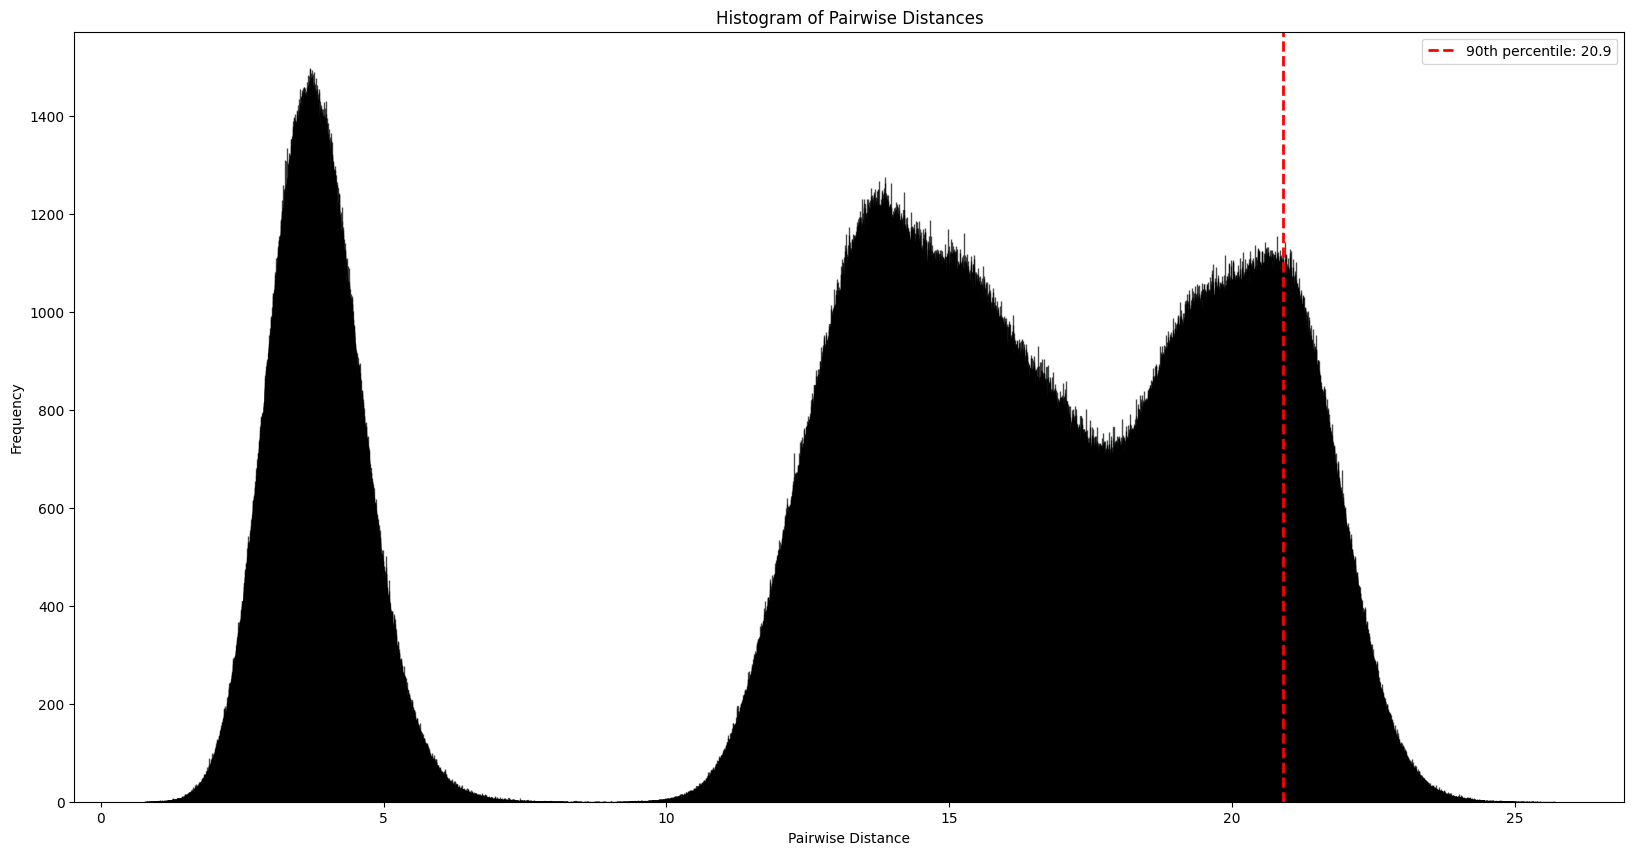

In [27]:
from scipy.spatial.distance import pdist
import math
ref_sample_for_sigma = dist_1.sample(10000) #care that in NPLM metric I always use a sample with 10000 points to estimate sigma 
pairwise_distance = pdist(ref_sample_for_sigma)
perc = 90
percentile_90 = round(np.percentile(pairwise_distance,perc),1)

print(f" The 90th percentile is: {percentile_90}")
print(f" The number of points in the plot is: {math.comb(10000,2)}")

plt.figure(figsize=(20, 10))
plt.hist(pairwise_distance, bins=100000, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(percentile_90, color='red', linestyle='dashed', linewidth=2, label=f'90th percentile: {percentile_90}')
plt.title('Histogram of Pairwise Distances')
plt.xlabel('Pairwise Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# plt.figure(figsize=(20, 10))
# plt.hist(pairwise_distance, bins=100000, color='skyblue', edgecolor='black', alpha=0.7)
# plt.axvline(percentile_90, color='red', linestyle='dashed', linewidth=2, label=f'90th percentile: {percentile_90}')
# plt.title('Histogram of Pairwise Distances')
# plt.yscale('log')
# plt.xlabel('Pairwise Distance')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()
